In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.filters import sobel

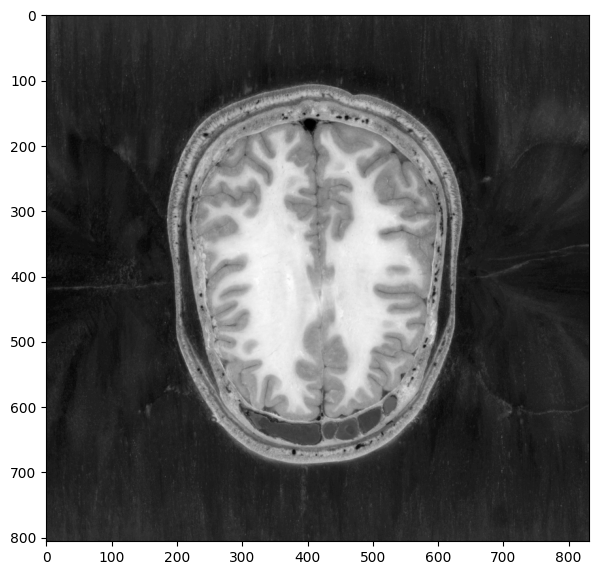

In [3]:
image = cv2.imread("Color_MRI.png", 0)
plt.figure(figsize=(7,7))
plt.imshow(image,cmap='gray')
plt.show()

In [4]:
seed1 = (400,350)
seed2 = (400,280)

In [17]:
def region_growing(img, seed, threshold = 20, variable_mean = False):
    dims = img.shape
    reg = np.zeros(dims)
    mean_reg = float(img[seed[1], seed[0]])
    size = 1
    pix_area = dims[0]*dims[1]
    contour = [] # will be [ [[x1, y1], val1],..., [[xn, yn], valn] ]
    contour_val = []
    dist = 0
    # TODO: may be enhanced later with 8th connectivity
    orient = [(1, 0), (0, 1), (-1, 0), (0, -1)] # 4 connectivity
    cur_pix = [seed[0], seed[1]]
    cycle = 0
    #Spreading
    while(dist<threshold and size<pix_area):
    #adding pixels
        for j in range(4):
            #select new candidate
            temp_pix = [cur_pix[0] +orient[j][0], cur_pix[1] +orient[j][1]]

            #check if it belongs to the image
            is_in_img = dims[0]>temp_pix[0]>0 and dims[1]>temp_pix[1]>0 #returns boolean
            #candidate is taken if not already selected before
            if (is_in_img and (reg[temp_pix[1], temp_pix[0]]==0)):
                contour.append(temp_pix)
                contour_val.append(img[temp_pix[1], temp_pix[0]] )
                reg[temp_pix[1], temp_pix[0]] = 150
        #add the nearest pixel of the contour in it
        dist = abs(int(np.mean(contour_val)) - mean_reg)

        dist_list = [abs(i - mean_reg) for i in contour_val ]
        dist = min(dist_list)    #get min distance
        index = dist_list.index(min(dist_list)) #mean distance index
        size += 1 # updating region size
        reg[cur_pix[1], cur_pix[0]] = 255

        #updating mean MUST BE FLOAT
        if(variable_mean):
            mean_reg = (mean_reg*size + float(contour_val[index]))/(size+1)
        #updating seed
        cur_pix = contour[index]

        #removing pixel from neigborhood
        del contour[index]
        del contour_val[index]
        cycle +=1
    print("Cycle: "+ str(cycle))
    return reg

Cycle: 47790
Cycle: 53788


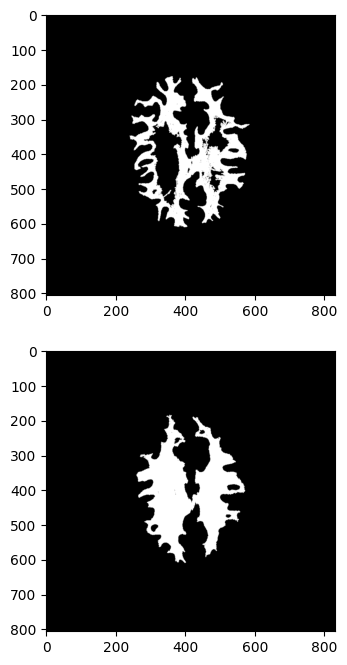

In [18]:
new1_f = region_growing(img=image,seed=seed1,variable_mean=False)
new1_t = region_growing(img=image,seed=seed1,variable_mean=True)
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.imshow(new1_f,cmap="gray")
plt.subplot(2,1,2)
plt.imshow(new1_t,cmap="gray")
plt.show()

Cycle: 76687
Cycle: 79506


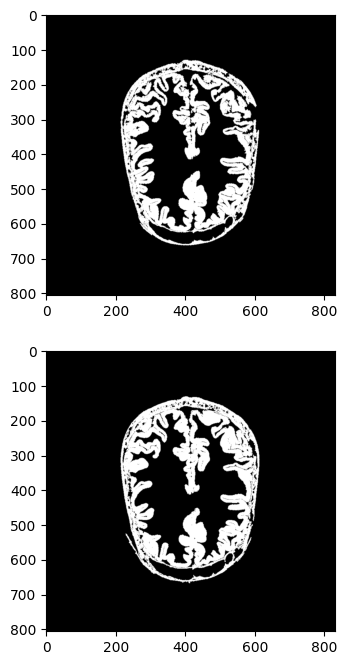

In [19]:
new1_f = region_growing(img=image,seed=seed2,variable_mean=False)
new1_t = region_growing(img=image,seed=seed2,variable_mean=True)
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.imshow(new1_f,cmap="gray")
plt.subplot(2,1,2)
plt.imshow(new1_t,cmap="gray")
plt.show()